In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from scipy import integrate 

In [3]:
plt.style.use(['science','notebook'])

In [14]:
h = 0.7 
m = 0.3 # omega_m
l = 0.7 # omega_lambda
c = 1

# Problem 3

In [109]:
z = np.linspace(0,1.3,101)

In [110]:
def x(z_arr, c, m, l, h): # define the inside of our function chi
    npoints = len(z_arr)
    output = np.zeros(npoints)  # array to store the output
    for i in range(npoints):
        output[i] = c / (100 * h * (m * (1 + z_arr[i])**3 + l + (1 - m - l) * (1 + z_arr[i])**2)**(1/2))
        
    return output

In [111]:
numerical_x = integrate.cumulative_trapezoid(y = x(z, c, m, l, h), x = z)

In [112]:
def series_expansion(z_arr, c, m, l, h):
    npoints = len(z_arr)
    output = np.zeros(npoints)  # array to store the output    
    for i in range(npoints):
        output[i] = c*z_arr[i]/(h*100)-3*c*z_arr[i]**2*m/(4*h*100)+c*z_arr[i]**3*(3*m+2*(1-m-l))**2/(8*h*100)-c*z_arr[i]**3*(6*m+2*(1-m-l))/(12*h*100)-c*z_arr[i]**2*(1-m-l)/(2*h*100)
        
    return output

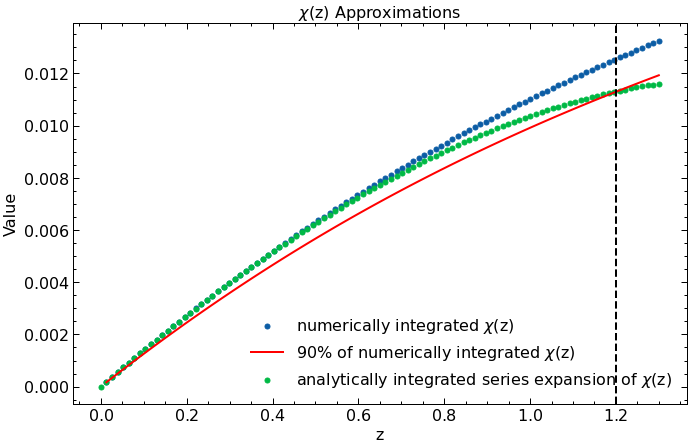

In [130]:
# plot numerically integrated X versus the series approximation of X

size = 25
plt.figure(figsize=(11,7))

plt.scatter(x = z[1:], y = numerical_x, s = size, label = r"numerically integrated $\chi$(z)")
plt.plot(z[1:], numerical_x*0.9, "r-", linewidth = 2, label = r"90% of numerically integrated $\chi$(z)")
plt.scatter(x = z[:], y = series_expansion(z, c, m, l, h), s = size, label = r"analytically integrated series expansion of $\chi$(z)")

plt.axvline(x = 1.2, color="k", linestyle = "--")

plt.title("$\chi$(z) Approximations")
plt.xlabel("z")
plt.ylabel("Value")
plt.legend()
plt.show()